In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

You should consider upgrading via the 'c:\Users\1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\1\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r'C:\Users\1\PML_assignment1\code\datasets\foodstruct_nutritional_facts.csv')
data.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.0,0.00018,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.0,0.00089,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.0,0.00430,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.0,0.00210,0.000021,0.11,0.0,0.02,NaN,NaN,NaN,NaN


In [4]:
print(data.isnull().sum())


Food Name                                  0
Category Name                              0
Calcium                                   25
Calories                                   0
Carbs                                      0
Cholesterol                               55
Copper                                    80
Fats                                       0
Fiber                                     98
Folate                                   103
Iron                                      21
Magnesium                                 61
Monounsaturated Fat                      110
Net carbs                                  1
Omega-3 - DHA                            272
Omega-3 - DPA                            279
Omega-3 - EPA                            271
Phosphorus                                48
Polyunsaturated fat                      110
Potassium                                 45
Protein                                    0
Saturated Fat                             81
Selenium  

In [5]:
missing_ratios = data.isnull().sum() / len(data)

columns_to_drop = missing_ratios[missing_ratios > 0.45].index

df = data.drop(columns=columns_to_drop)

In [6]:
df.fillna(0, inplace=True)

print(df.isnull().sum())

Food Name              0
Category Name          0
Calcium                0
Calories               0
Carbs                  0
Cholesterol            0
Copper                 0
Fats                   0
Fiber                  0
Folate                 0
Iron                   0
Magnesium              0
Monounsaturated Fat    0
Net carbs              0
Omega-3 - DHA          0
Omega-3 - DPA          0
Omega-3 - EPA          0
Phosphorus             0
Polyunsaturated fat    0
Potassium              0
Protein                0
Saturated Fat          0
Selenium               0
Sodium                 0
Vitamin A (IU)         0
Vitamin A RAE          0
Vitamin B1             0
Vitamin B12            0
Vitamin B2             0
Vitamin B3             0
Vitamin B5             0
Vitamin B6             0
Vitamin C              0
Zinc                   0
Choline                0
Histidine              0
Isoleucine             0
Leucine                0
Lysine                 0
Manganese              0


In [7]:
from sklearn.preprocessing import LabelEncoder


food_encoder = LabelEncoder()
category_encoder = LabelEncoder()

df['Food Name'] = food_encoder.fit_transform(df['Food Name'])

df['Category Name'] = category_encoder.fit_transform(df['Category Name'])

df.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Manganese,Methionine,Phenylalanine,Sugar,Threonine,Tryptophan,Valine,Vitamin D,Vitamin E,Vitamin K
0,4,5,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,0.00000,0.00000,0.00000,0.00,0.00000,0.00000,0.00000,0.0,0.00000,0.000000
1,24,5,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.00004,0.00000,0.00001,10.00,0.00001,0.00000,0.00001,0.0,0.00018,0.000002
2,30,5,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.00008,0.00001,0.00005,9.20,0.00005,0.00002,0.00005,0.0,0.00089,0.000003
3,352,5,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.00024,0.00002,0.00006,53.00,0.00007,0.00002,0.00008,0.0,0.00430,0.000003
4,42,5,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.00014,0.00004,0.00010,0.66,0.00007,0.00003,0.00011,0.0,0.00210,0.000021


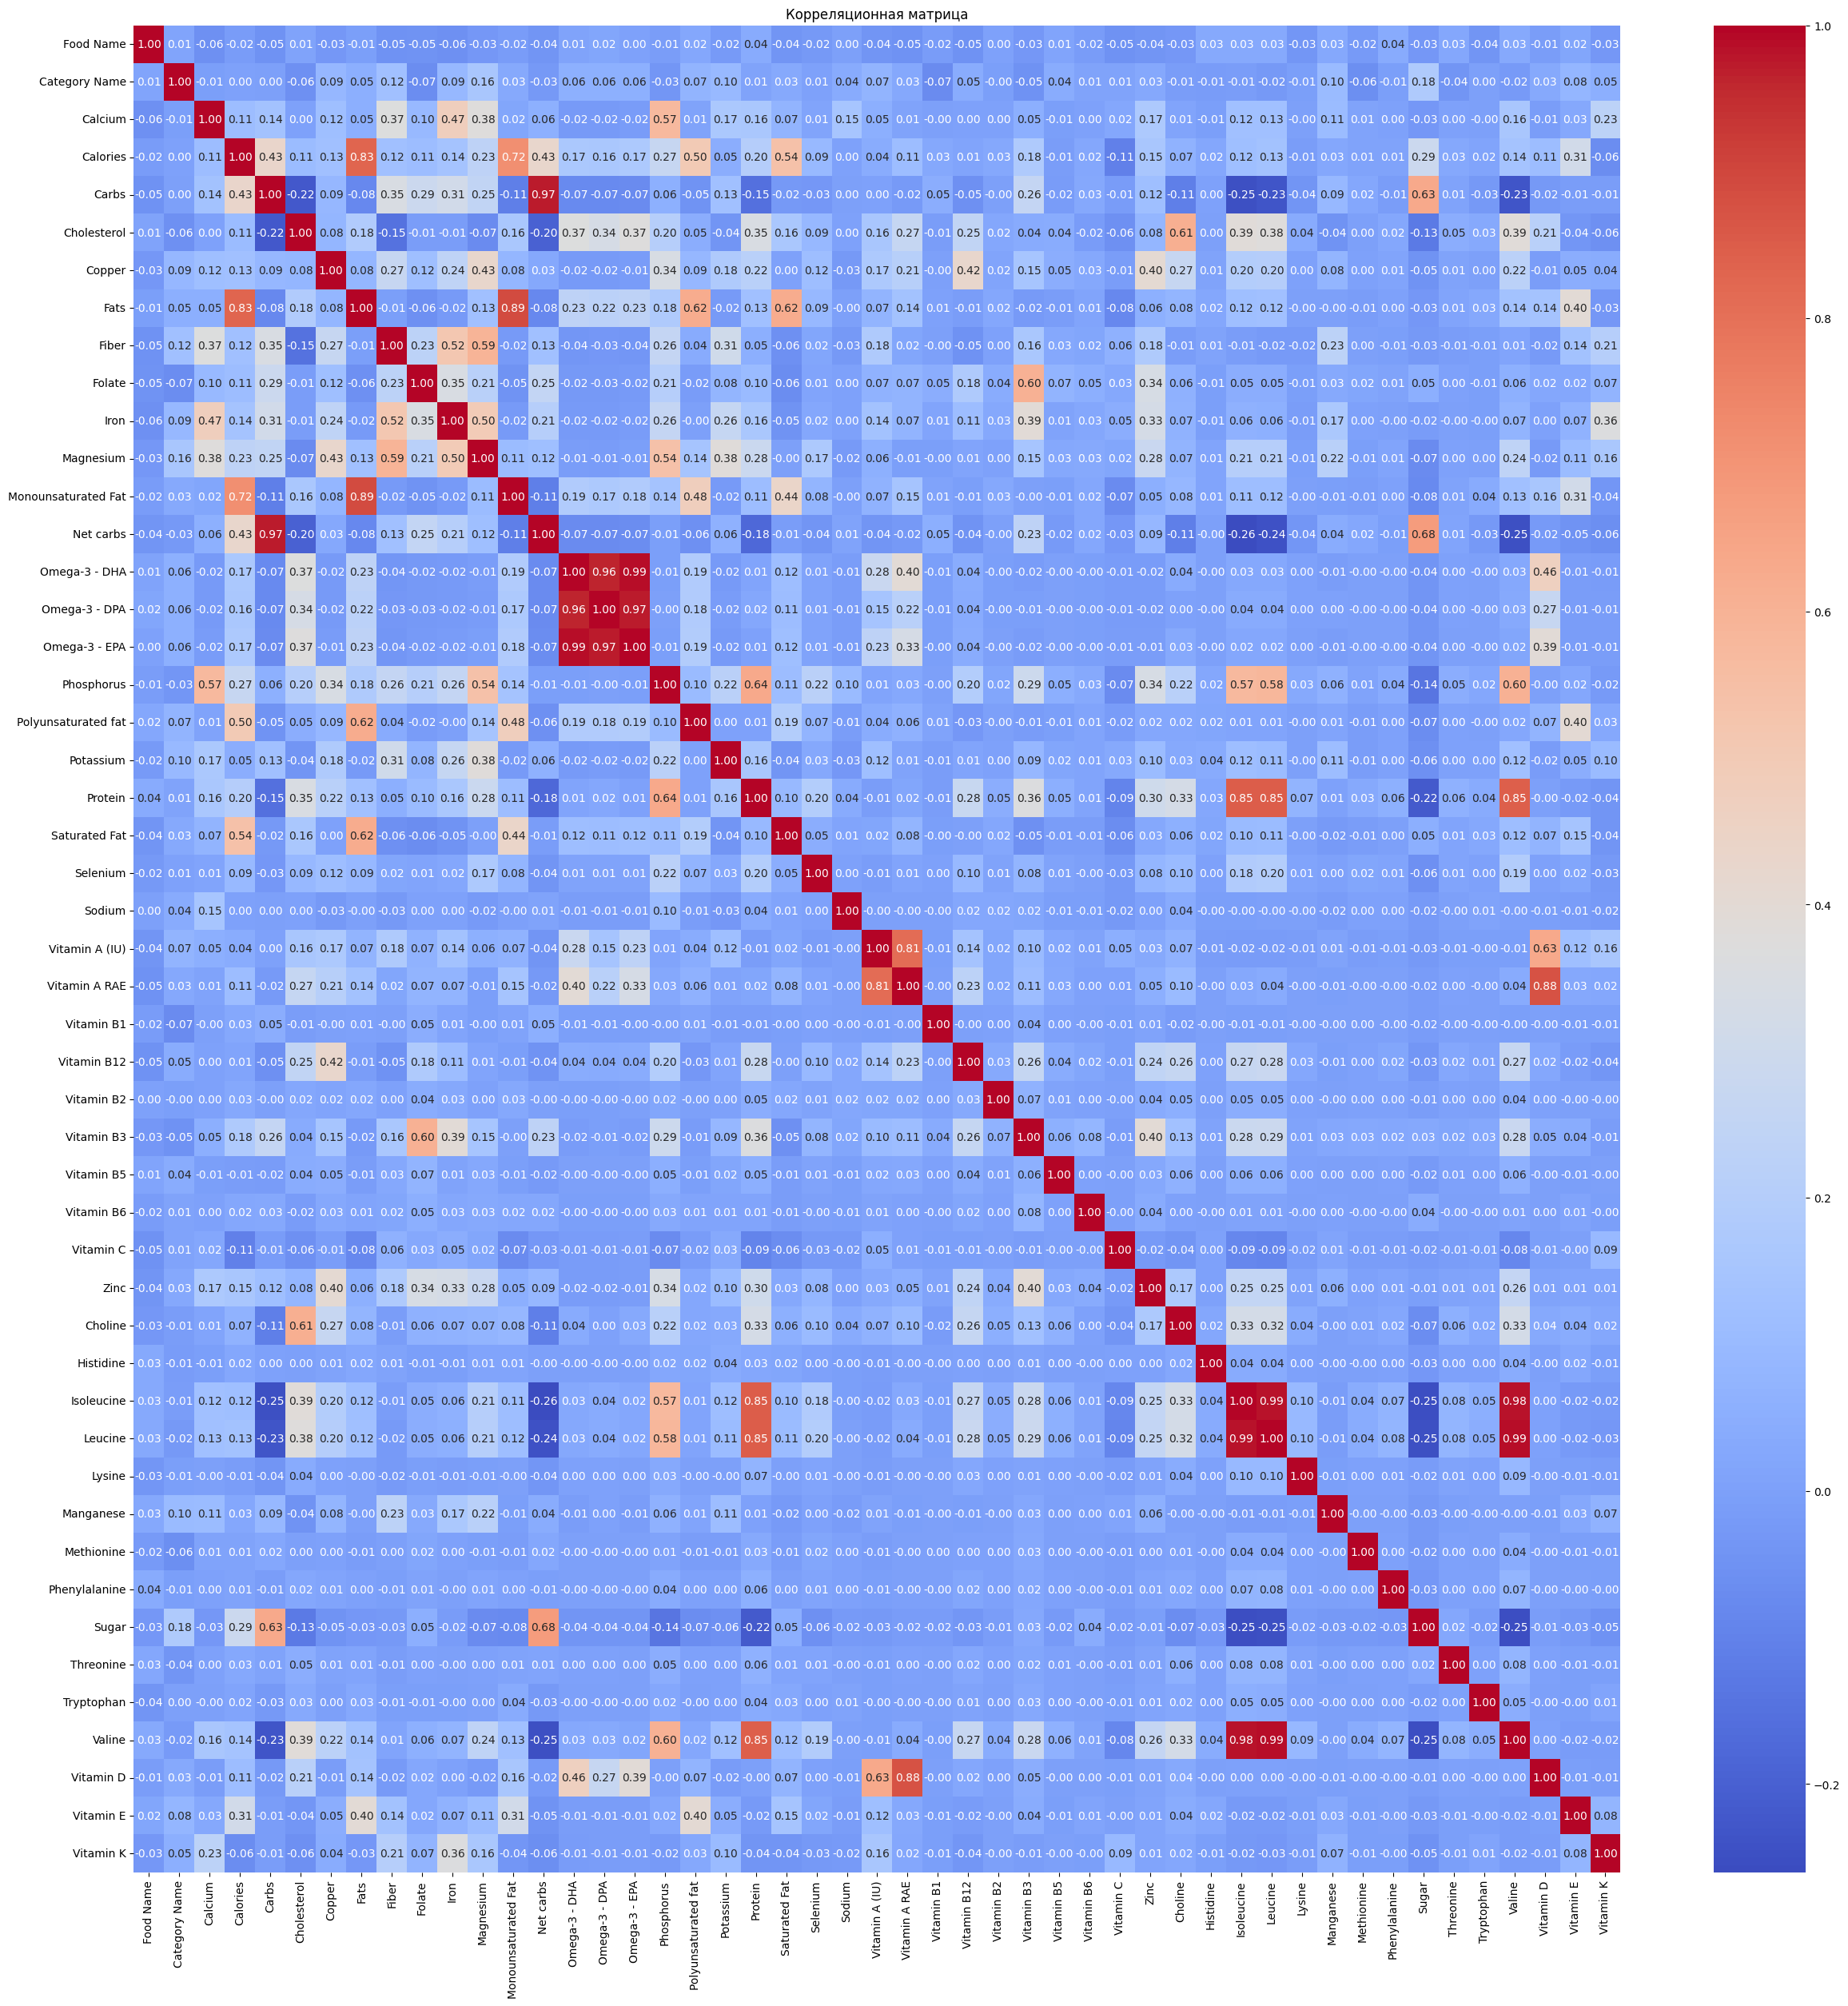

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица')
plt.show()

In [9]:
correlation_matrix = df.corr()

protein_correlations = correlation_matrix['Calories']

In [10]:
columns_to_drop = protein_correlations[protein_correlations.abs() < 0.15].index

columns_to_drop = [col for col in columns_to_drop if col not in df.columns[:2]]

df_new = df.drop(columns=columns_to_drop)

print(df_new)

      Food Name  Category Name  Calories  Carbs   Fats  Magnesium  \
0             4              5      32.0    7.7   0.30      0.018   
1            24              5      52.0   14.0   0.17      0.005   
2            30              5      48.0   11.0   0.39      0.010   
3           352              5     241.0   63.0   0.51      0.032   
4            42              5     160.0    8.5  15.00      0.029   
...         ...            ...       ...    ...    ...        ...   
1169        950              8     293.0   27.0  14.00      0.022   
1170       1112              8     331.0   82.0   0.10      0.002   
1171         45              0     379.0   73.0   4.40      0.100   
1172       1173              0     426.0   74.0   9.70      0.014   
1173        193              0      47.0   11.0   0.10      0.003   

      Monounsaturated Fat  Net carbs  Omega-3 - DHA  Omega-3 - DPA  \
0                    0.08        6.6           0.00           0.00   
1                    0.01      

In [11]:
scaler = StandardScaler()

df_processed = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

df_processed.head()

,Food Name,Category Name,Calories,Carbs,Fats,Magnesium,Monounsaturated Fat,Net carbs,Omega-3 - DHA,Omega-3 - DPA,Omega-3 - EPA,Phosphorus,Polyunsaturated fat,Protein,Saturated Fat,Vitamin B3,Zinc,Sugar,Vitamin E
0,-1.718773,-0.721422,-1.035813,-0.637615,-0.563601,-0.324305,-0.456377,-0.604605,-0.082812,-0.088039,-0.079675,-0.782426,-0.314146,-0.880450,-0.421848,-0.515631,-0.419736,-0.495401,-0.203543
1,-1.659760,-0.721422,-0.928147,-0.406088,-0.570756,-0.518206,-0.465077,-0.433443,-0.082812,-0.088039,-0.079675,-0.782426,-0.319228,-0.896220,-0.426892,-0.591754,-0.438873,0.104954,-0.172383
2,-1.642056,-0.721422,-0.949680,-0.516339,-0.558649,-0.443629,-0.445192,-0.507353,-0.082812,-0.088039,-0.079675,-0.706122,-0.315417,-0.767808,-0.426892,-0.466519,-0.387842,0.056925,-0.049472
3,-0.691935,-0.721422,0.089297,1.394674,-0.552045,-0.115487,-0.457620,1.278178,-0.082812,-0.088039,-0.079675,-0.400908,-0.316687,-0.542524,-0.428153,0.024600,-0.327242,2.686480,0.540848
4,-1.606647,-0.721422,-0.346751,-0.608215,0.245367,-0.160234,0.751638,-0.791327,-0.082812,-0.088039,-0.079675,-0.521722,-0.096916,-0.700223,-0.165875,-0.196403,-0.247505,-0.455778,0.159996


In [24]:
X = df_processed.drop(columns=['Calories'])  
y = df_processed['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, r2)

0.016546296654410146 0.9854569534762987
